# Manual Calculation

import library

In [ ]:
# from __future__ import division, print_function, unicode_literals
import numpy as np # used for arrays, matrices
import matplotlib.pyplot as plt # usedd for plotting graphs

Data (height and weight)

In [ ]:
X = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170]]).T # transfer row to column
y = np.array([[49, 50, 51, 52, 54, 56, 58, 59, 60, 62]]).T # transfer row to column
print("X=",X)
print("y=",y)

X= [[147]
 [150]
 [153]
 [155]
 [158]
 [160]
 [163]
 [165]
 [168]
 [170]]
y= [[49]
 [50]
 [51]
 [52]
 [54]
 [56]
 [58]
 [59]
 [60]
 [62]]


Visualize data

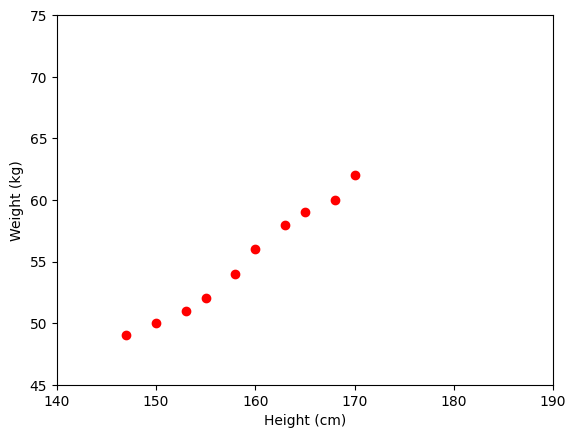

In [ ]:
plt.plot(X, y, "ro") # "ro" → red ("r") circle ("o") markers
plt.axis([140, 190, 45, 75])# plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("Height (cm)") # name for x-axis
plt.ylabel("Weight (kg)") # name for y-axis
plt.show() # Display the plot on the

Building Xbar

In [ ]:
# print(np.ones((3,1)))
# print(X.shape[0])
one = np.ones((X.shape[0], 1)) # create column vector of ones(float)
Xbar = np.concatenate((one, X), axis = 1)
print(one)
print(Xbar)

[[1.]
 [1.]
 [1.]]
10
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 155.]
 [  1. 158.]
 [  1. 160.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]]


Calculating weights of the fitting line

In [ ]:
A = np.dot(Xbar.T, Xbar)
# print(A)
b = np.dot(Xbar.T, y)
# print(b)
w = np.dot(np.linalg.pinv(A), b)
print("w = ", w)

[[1.00000e+01 1.58900e+03]
 [1.58900e+03 2.53025e+05]]
[[  551.]
 [87867.]]
w =  [[-38.26008632]
 [  0.58753988]]


Preparing the fitting line

In [ ]:
w_0 = w[0][0]
print(w_0)
w_1 = w[1][0]
print(w_1)
x0 = np.linspace(145, 185, 2)
print(x0)
y0 = w_0 + w_1*x0
print(y0)

-38.26008631840652
0.5875398761385269
[145. 185.]
[46.93319572 70.43479077]


Drawing the fitting line

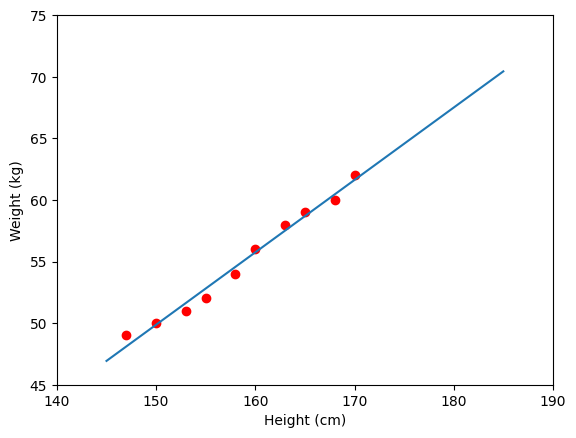

In [ ]:
plt.plot(X.T, y.T, "ro")# "ro" → red ("r") circle ("o") markers
# data
plt.plot(x0, y0)
# the fitting line
plt.axis([140, 190, 45, 75]) #xmin, xmax, ymin, ymax
plt.xlabel("Height (cm)") # name for x-axis
plt.ylabel("Weight (kg)") # name for y-axis
plt.show() # plotting the graps

# Using Library

import library

In [ ]:
from sklearn import datasets, linear_model

fit the model by Linear Regression

In [ ]:
regr = linear_model.LinearRegression(fit_intercept=False)

fit_intercept = False for calculating the bias

In [ ]:
regr.fit(Xbar, y)

LinearRegression(fit_intercept=False)

Compare two results

In [ ]:
print( "Solution found by scikit-learn: ", regr.coef_ )
print( "Solution found by (5): ", w.T)

Solution found by scikit-learn:  [[-38.26008632   0.58753988]]
Solution found by (5):  [[-38.26008632   0.58753988]]


# Classification with DT

import library

In [ ]:
import pandas as pd # data analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv


--2026-01-28 07:52:33--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2026-01-28 07:52:33 (41.6 MB/s) - ‘iris.csv’ saved [3716/3716]



Load the dataset

In [ ]:
file_path ="/content/iris.csv"
df = pd.read_csv(file_path)

Inspect the first few rows of the dataset

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Separate features and labels

In [ ]:
X = df.iloc[:, :-1] # Features: all columns except the last
y = df.iloc[:, -1]
# Labels: the last column

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)

Create and train the Decision Tree classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions on the test set

In [ ]:
y_pred = clf.predict(X_test)

Evaluate the classifier

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Visualize the Decision Tree

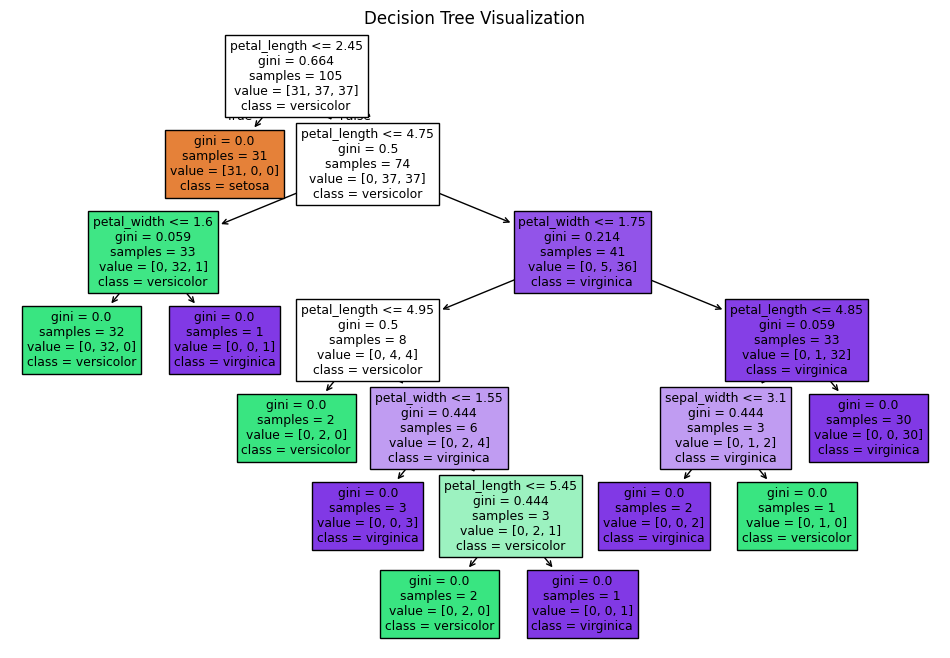

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Different Classification Algorithms

Initialize classifiers

In [ ]:
classifiers = {
"SVM": SVC(kernel="linear", random_state=42),
"k-NN": KNeighborsClassifier(n_neighbors=5),
"Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=4)
}

Train and evaluate each classifier

In [ ]:
for name, clf in classifiers.items():
    print(f"\n=== {name} Classifier ===")
    clf.fit(X_train, y_train) # Train the classifier
    y_pred = clf.predict(X_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


=== SVM Classifier ===
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== k-NN Classifier ===
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Neural Network Classifier ===
Accuracy: 0.96
Classification Report:
              precision    recall  f1-sc

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
